# Task 1.1 Data Cleaning & Understanding

In [193]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats import pearsonr

## Dataset Loading

In [194]:
df_incidents = pd.read_csv('datasets_original/incidents.csv', sep=',', index_col=False, low_memory=False) # gun incidents in the USA
# Note: since the first column isn't a column of indexes (it's the date column), we set index_col=False

df_poverty = pd.read_csv('datasets_original/povertyByStateYear.csv', sep=',', index_col=False) # poverty percentage in the USA
# Note: the first column isn't a column of indexes

df_elections = pd.read_csv('datasets_original/year_state_district_house.csv', sep=',', index_col=False) # congressional elections in the USA
# Note: the first column isn't a column of indexes

In [195]:
print(df_incidents.head())

         date                 state city_or_county  \
0  2015-05-02               Indiana   Indianapolis   
1  2017-04-03          Pennsylvania           Kane   
2  2016-11-05              Michigan        Detroit   
3  2016-10-15  District of Columbia     Washington   
4  2030-06-14          Pennsylvania     Pittsburgh   

                              address  latitude  longitude  \
0       Lafayette Road and Pike Plaza   39.8322   -86.2492   
1                           5647 US 6   41.6645   -78.7856   
2   6200 Block of East McNichols Road   42.4190   -83.0393   
3  1000 block of Bladensburg Road, NE   38.9030   -76.9820   
4     California and Marshall Avenues   40.4621   -80.0308   

   congressional_district  state_house_district  state_senate_district  \
0                     7.0                  94.0                   33.0   
1                     5.0                   NaN                    NaN   
2                    14.0                   4.0                    2.0   
3     

In [196]:
print(df_poverty.head())

           state  year  povertyPercentage
0  United States  2020               11.5
1        Alabama  2020               14.8
2         Alaska  2020               11.5
3        Arizona  2020               12.1
4       Arkansas  2020               15.8


In [197]:
print(df_elections.head())

   year    state  congressional_district       party  candidatevotes  \
0  1976  ALABAMA                       1  REPUBLICAN           98257   
1  1976  ALABAMA                       2  REPUBLICAN           90069   
2  1976  ALABAMA                       3    DEMOCRAT          106935   
3  1976  ALABAMA                       4    DEMOCRAT          141490   
4  1976  ALABAMA                       5    DEMOCRAT          113553   

   totalvotes  
0      157170  
1      156362  
2      108048  
3      176022  
4      113560  


## Basic Statistics

In [198]:
print("Info about df_incidents: \n")
df_incidents.info()

Info about df_incidents: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  av

In [199]:
df_incidents.n_participants_teen.unique()

array(['0.0', nan, '1.0', '2.0', '3.0', '4.0', '5.0', '15.0', '-864',
       '6.0', '7.0', '762487', '-753', '-854', '444036', '-138', '10.0',
       'ymwa4vyx', '9.0', '27.0', 'akendyt6a', '-927', '-130',
       'x2aqam13iy', '445652', 'eqsa', '8.0', '-49', 'nt082ps', '-873',
       '-427', '-947', 'wcrt3x4', 'p2eyl'], dtype=object)

In [200]:
print("Info about df_poverty: \n")
df_poverty.info()

Info about df_poverty: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [201]:
print("Info about df_elections: \n")
df_elections.info()

Info about df_elections: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.5+ KB


In [202]:
df_incidents.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


In [203]:
df_poverty.describe()

,year,povertyPercentage
count,884.000000,832.000000
mean,2011.998869,12.535817
std,4.902330,3.205233
min,2004.000000,5.400000
25%,2008.000000,10.200000
50%,2012.000000,12.000000
75%,2016.000000,14.700000
max,2020.000000,21.800000


In [204]:
df_elections.describe()

,year,congressional_district,candidatevotes,totalvotes
count,10441.000000,10441.000000,1.044100e+04,1.044100e+04
mean,1999.002011,9.873096,1.345276e+05,2.076422e+05
std,13.845898,10.017078,5.160721e+04,8.262643e+04
min,1976.000000,0.000000,-1.000000e+00,-1.000000e+00
25%,1988.000000,3.000000,1.004870e+05,1.554510e+05
50%,2000.000000,6.000000,1.290850e+05,2.004450e+05
75%,2012.000000,13.000000,1.653710e+05,2.555770e+05
max,2022.000000,53.000000,1.165136e+06,2.656104e+06


In [205]:
# Here we justify why the date column in df_incidents can't be used as index column

print("Number of distinct values in 'date': \t", df_incidents.date.nunique())

# Since there are 239677 incidents, and it turns out that there are 2437 distinct dates, we deduce that on certain dates multiple incidents occurred. In conclusion, the dates are not a unique identifier for the incidents.

Number of distinct values in 'date': 	 2437


In [206]:
# Missing values detection
# print the n. of missing values for each attribute


In [207]:
df_poverty.isnull().any()

state                False
year                 False
povertyPercentage     True
dtype: bool

In [208]:
df_elections.isnull().any()

year                      False
state                     False
congressional_district    False
party                     False
candidatevotes            False
totalvotes                False
dtype: bool

## Data Cleaning

### Deduplication

In the first place we want to see if there are duplicate rows in the datasets.

In [209]:
# We want to see if there are duplicate rows in df_incidents
df_incidents[df_incidents.duplicated(keep=False)]

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
778,2015-04-27,California,Oakland,1 Airport Drive,37.7116,-122.2120,13.0,18.0,9.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,NaN,Non-Shooting Incident,TSA Action
976,2016-03-21,Utah,Salt Lake City,776 N Terminal Dr.,40.7821,-111.9800,2.0,23.0,1.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,9mm,Non-Shooting Incident,TSA Action
1614,2016-03-14,District of Columbia,Washington,NaN,38.9075,-77.0176,1.0,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,NaN,Non-Shooting Incident,Possession (gun(s) found during commission of ...
3303,2015-06-24,Texas,San Antonio,9800 Airport Boulevard,29.5217,-98.4767,21.0,121.0,25.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,NaN,Non-Shooting Incident,TSA Action
3391,2015-09-04,Georgia,Atlanta,6000 North Terminal Parkway,33.6356,-84.4333,5.0,60.0,34.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,NaN,Non-Shooting Incident,TSA Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237755,2015-12-29,District of Columbia,Washington,NaN,38.9075,-77.0176,1.0,NaN,NaN,NaN,...,NaN,NaN,0,0,1.0,0.0,1.0,NaN,Non-Shooting Incident,Possession (gun(s) found during commission of ...
238138,2016-02-19,Maryland,Baltimore,PO BOX 8766,39.1841,-76.6711,3.0,32.0,32.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,NaN,Non-Shooting Incident,TSA Action
239260,2015-01-14,Oklahoma,Oklahoma City,7100 Terminal Dr,35.3953,-97.5966,5.0,90.0,44.0,NaN,...,NaN,NaN,0,0,NaN,NaN,0.0,Will Rogers World Airport,TSA Action,NaN
239354,2030-04-03,New York,Rochester,1200 Brooks Ave,43.1309,-77.6696,25.0,137.0,56.0,NaN,...,1.0,0.0,0,0,0.0,1.0,1.0,TSA,Non-Shooting Incident,TSA Action


In [210]:
df_incidents.drop_duplicates(inplace=True) # we drop the duplicated rows from the dataframe.
# now there are not dup rows anymore, as we can check:
df_incidents[df_incidents.duplicated()]

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2


### Dtype casting
Now, we convert attributes in the desired data type.


In [211]:
df_incidents.date=pd.to_datetime(df_incidents.date) # we convert the date column to datetime type
print(pd.DatetimeIndex(df_incidents.date).year.unique()) # we check that the year column is correct
print(pd.DatetimeIndex(df_incidents.date).month.unique()) # we check that the month column is correct
print(pd.DatetimeIndex(df_incidents.date).day.unique()) # we check that the day column is correct


Int64Index([2015, 2017, 2016, 2030, 2014, 2018, 2029, 2013, 2028], dtype='int64', name='date')
Int64Index([5, 4, 11, 10, 6, 1, 3, 8, 12, 2, 7, 9], dtype='int64', name='date')
Int64Index([ 2,  3,  5, 15, 14, 18, 25, 16,  1, 22, 19, 21,  6, 17, 26, 11, 27,
             8, 30, 13, 23,  7,  4,  9, 28, 29, 24, 20, 12, 10, 31],
           dtype='int64', name='date')


In [212]:
df_incidents.state= df_incidents.state.astype('string')
df_incidents.state.unique() 

<StringArray>
[             'Indiana',         'Pennsylvania',             'Michigan',
 'District of Columbia',       'North Carolina',            'Louisiana',
          'Connecticut',             'Virginia',             'Oklahoma',
             'New York',             'Missouri',           'California',
                'Texas',             'Illinois',                 'Ohio',
           'Washington',              'Florida',       'South Carolina',
              'Georgia',        'Massachusetts',            'Tennessee',
        'West Virginia',           'New Jersey',             'Arkansas',
         'Rhode Island',                'Maine',               'Nevada',
             'Colorado',           'New Mexico',             'Maryland',
               'Oregon',         'South Dakota',             'Kentucky',
              'Alabama',              'Arizona',            'Minnesota',
            'Wisconsin',          'Mississippi',               'Kansas',
                 'Iowa',             

In [213]:
df_incidents.city_or_county= df_incidents.city_or_county.astype('string')
df_incidents.address= df_incidents.address.astype('string')

In [214]:
df_incidents.congressional_district= df_incidents.congressional_district.astype('Int64')

In [215]:
print(df_incidents.participant_age_group1.unique())
df_incidents.participant_age_group1= df_incidents.participant_age_group1.astype('string')

['Adult 18+' nan 'Teen 12-17' 'Child 0-11']


In [216]:
print(df_incidents.participant_gender1.unique())
# print how many of each value there are
print(df_incidents.participant_gender1.value_counts()) # there is only one that is labelled 'Male, female'
# we decided to convert 'Male, female' to nan
df_incidents.participant_gender1= df_incidents.participant_gender1.astype('string')
print(df_incidents.participant_gender1.unique())


['Male' nan 'Female' 'Male, female']
Male            177899
Female           25366
Male, female         1
Name: participant_gender1, dtype: int64
<StringArray>
['Male', <NA>, 'Female', 'Male, female']
Length: 4, dtype: string


In [217]:
# convert the ages that are strings to nan
def convert_to_float(x):
    '''
    This function checks if a string can be converted to a float.
    '''
    try:
        return float(x)
          
    except ValueError:
        return np.nan

# convert the ages that are strings to nan
df_incidents.min_age_participants=df_incidents.min_age_participants.apply(lambda x: convert_to_float(x))
df_incidents.min_age_participants= df_incidents.min_age_participants.astype('Float64')

# same for max_age and avg_age
df_incidents.max_age_participants=df_incidents.max_age_participants.apply(lambda x: convert_to_float(x))
df_incidents.max_age_participants= df_incidents.max_age_participants.astype('Float64')

df_incidents.avg_age_participants=df_incidents.avg_age_participants.apply(lambda x: convert_to_float(x))
df_incidents.avg_age_participants= df_incidents.avg_age_participants.astype('Float64')


In [218]:
# we see the values for n_participants_child, teen and adult
print(df_incidents.n_participants_child.unique())
print(df_incidents.n_participants_teen.unique())
print(df_incidents.n_participants_adult.unique())

# convert the values that are strings to nan
df_incidents.n_participants_child=df_incidents.n_participants_child.apply(lambda x: np.nan if is_number(x)==False else x)
df_incidents.n_participants_child= df_incidents.n_participants_child.astype('Float64')

df_incidents.n_participants_teen=df_incidents.n_participants_teen.apply(lambda x: np.nan if is_number(x)==False else x)
df_incidents.n_participants_teen= df_incidents.n_participants_teen.astype('Float64')

df_incidents.n_participants_adult=df_incidents.n_participants_adult.apply(lambda x: np.nan if is_number(x)==False else x)
df_incidents.n_participants_adult= df_incidents.n_participants_adult.astype('Float64')
print('converted values')
print(df_incidents.n_participants_child.unique())

['0.0' nan '1.0' '2.0' '3.0' '835473' '5.0' '4.0' '124130.0' '436587'
 '6yb1lceu3v' '6.0' '7.0' '886365.0' 'z6sp' '607874' '292381' '-73' '11.0'
 '25yerfqn6' '8.0' '-977.0' '77mw3iw3' '-884.0' 'j34' '-252.0']
['0.0' nan '1.0' '2.0' '3.0' '4.0' '5.0' '15.0' '-864' '6.0' '7.0'
 '762487' '-753' '-854' '444036' '-138' '10.0' 'ymwa4vyx' '9.0' '27.0'
 'akendyt6a' '-927' '-130' 'x2aqam13iy' '445652' 'eqsa' '8.0' '-49'
 'nt082ps' '-873' '-427' '-947' 'wcrt3x4' 'p2eyl']
['1.0' nan '5.0' '0.0' '3.0' '4.0' '2.0' '6.0' '7.0' '8.0' '10.0' '9.0'
 '28.0' '24.0' '12.0' '17.0' '13.0' '33.0' '16.0' '15.0' '638402.0' '11.0'
 '425457' '29.0' '18.0' '-496' '20.0' '21.0' 'ipw' '14.0' '32.0' '-991'
 '5uw' '-673' '22.0' '27.0' '-267' '19.0' '686533' '479961' '30.0'
 '298481' '63.0' '-601' '-918' '-622' 'jbpiz8upz' '25.0' '827900' '-355.0'
 '103.0']
converted values
<FloatingArray>
[     0.0,     <NA>,      1.0,      2.0,      3.0, 835473.0,      5.0,
      4.0, 124130.0, 436587.0,      6.0,      7.0, 886365.0

In [219]:
print(df_incidents.incident_characteristics1.value_counts())
print(df_incidents.incident_characteristics2.value_counts())
# spostare

Shot - Wounded/Injured                                                                                  93910
Shot - Dead (murder, accidental, suicide)                                                               45051
Non-Shooting Incident                                                                                   41399
Shots Fired - No Injuries                                                                               33940
Armed robbery with injury/death and/or evidence of DGU found                                             7520
Institution/Group/Business                                                                               4316
TSA Action                                                                                               2561
Brandishing/flourishing/open carry/lost/found                                                            1350
Home Invasion                                                                                            1321
Possession

In [220]:
df_poverty.state= df_poverty.state.astype('string') 
print(df_poverty.state.unique())


<StringArray>
[       'United States',              'Alabama',               'Alaska',
              'Arizona',             'Arkansas',           'California',
             'Colorado',          'Connecticut',             'Delaware',
 'District of Columbia',              'Florida',              'Georgia',
               'Hawaii',                'Idaho',             'Illinois',
              'Indiana',                 'Iowa',               'Kansas',
             'Kentucky',            'Louisiana',                'Maine',
             'Maryland',        'Massachusetts',             'Michigan',
            'Minnesota',          'Mississippi',             'Missouri',
              'Montana',             'Nebraska',               'Nevada',
        'New Hampshire',           'New Jersey',           'New Mexico',
             'New York',       'North Carolina',         'North Dakota',
                 'Ohio',             'Oklahoma',               'Oregon',
         'Pennsylvania',         'Rho

In [221]:
df_elections.state= df_elections.state.astype('string')
df_elections.party= df_elections.party.astype('string')

In [256]:
df_incidents.min_age_participants[df_incidents.min_age_participants>1000000 ]

70729          7000000.0
113856    900000000000.0
Name: min_age_participants, dtype: Float64

### Incoherent data 
Now, we fix data that are clearly non coherent, for example negative ages or too big number of participants, and variables of the wrong types, e.g. alphanumeric strings for ages etc.
For now, we

## Data quality

#### Incidents

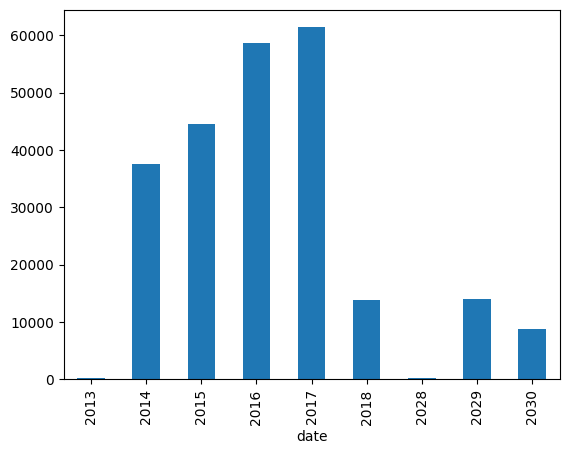

In [22]:
# We want to identify the dates in df_incidents that are erroneous

df_incidents.date = pd.to_datetime(df_incidents.date, errors='coerce') # the invalid dates are set to NaT (=Not a Time)

df_incidents.date.groupby(df_incidents.date.dt.year).count().plot(kind='bar')
plt.show()

# From the following histogram we deduce that there are some incidents that should have happened after 2023 (the year we are in), so it is certainly impossible for us to have this data today

In [23]:
# print some incidents with year > 2018, where some people were killed
df_incidents[(df_incidents.date.dt.year > 2018) & (df_incidents.n_killed > 0)].head()

,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,...,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
82,2029-05-13,New Mexico,Albuquerque,8700 block of Spotted Pony SW,35.0419,-106.7300,1.0,13.0,11.0,NaN,...,1.0,0.0,1,0,0.0,0.0,1.0,1mvk,"Shot - Dead (murder, accidental, suicide)",NaN
108,2030-11-14,New York,Watertown,Route 11,43.9685,-75.9121,21.0,116.0,48.0,NaN,...,1.0,0.0,1,0,0.0,0.0,1.0,"near County Rd 67, ofc followed truck, man sho...","Shot - Dead (murder, accidental, suicide)",Suicide^
186,2029-10-22,Arizona,Phoenix,2200 North 59th Avenue,33.4715,-112.1860,7.0,19.0,19.0,NaN,...,3.0,0.0,1,2,0.0,0.0,3.0,NaN,Shot - Wounded/Injured,"Shot - Dead (murder, accidental, suicide)"
550,2029-09-29,Nevada,Reno,1600 block of Wedekind Road,39.5465,-119.8020,2.0,24.0,13.0,NaN,...,1.0,1.0,1,0,0.0,1.0,2.0,NaN,"Shot - Dead (murder, accidental, suicide)",Armed robbery with injury/death and/or evidenc...
573,2030-01-08,Indiana,Indianapolis,805 Bellhaven Place,39.7767,-85.9539,7.0,89.0,28.0,NaN,...,2.0,0.0,1,0,1.0,0.0,2.0,One brother shoots another to death after argu...,"Shot - Dead (murder, accidental, suicide)",Domestic Violence


The incidents seem well documented, so we can't say that they are erroneous. We can surely say that the date is wrong.

### Poverty

In [24]:
print("Distinct Values in state: \t", df_poverty.state.unique())
print("total n. of states: \t\t", df_poverty.state.nunique())

Distinct Values in state: 	 ['United States' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'District of Columbia' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada'
 'New Hampshire' 'New Jersey' 'New Mexico' 'New York' 'North Carolina'
 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']
total n. of states: 		 52


In [25]:
print("Distinct Values in state: \t", df_poverty.state.nunique())
# We notice that there are 52 states, however the USA has 50 distinct states
# one is the average poverty in all the U.S., the other is the District of Columbia, which is not considered a state.

Distinct Values in state: 	 52


<Axes: title={'center': 'Poverty in the USA'}, xlabel='year'>

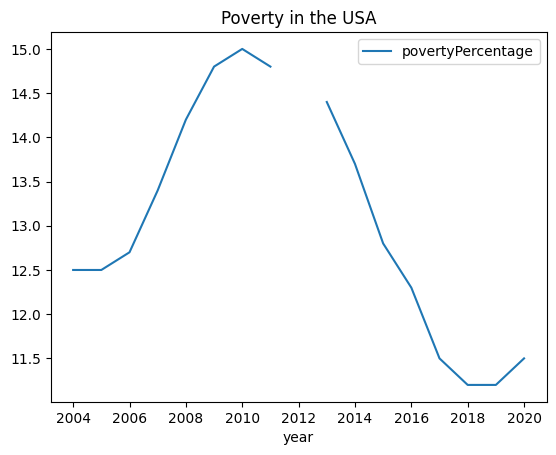

In [26]:
# made a graph with poverty over the years of the entire USA
df_poverty[df_poverty.state == 'United States'].plot(x='year', y='povertyPercentage', kind='line', title='Poverty in the USA')

<Axes: title={'center': 'Average poverty percentage of each state'}, xlabel='state'>

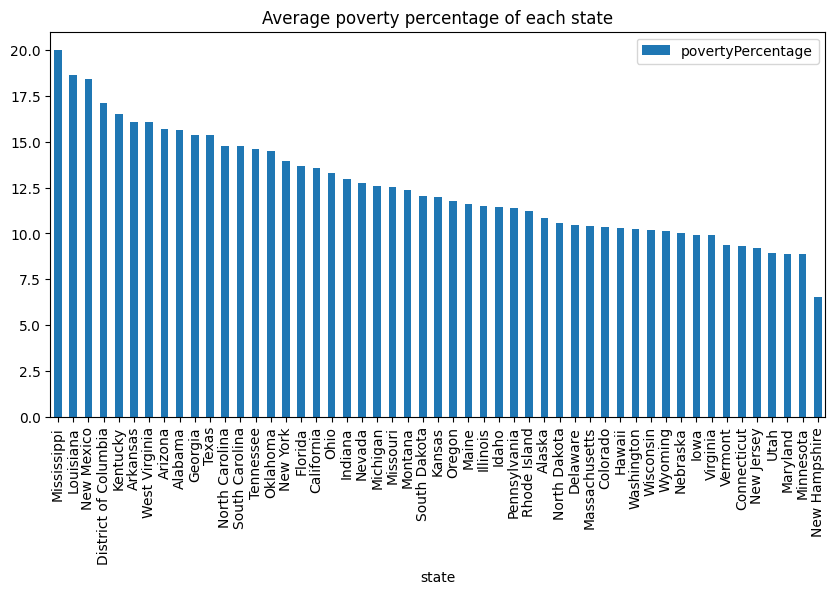

In [27]:
# bar of the average poverty percentage of each state ordering by most poor state
df_poverty[df_poverty.state != 'United States'].groupby('state').mean().sort_values(by='povertyPercentage', ascending=False).plot(kind='bar', title='Average poverty percentage of each state', y= 'povertyPercentage', figsize=(10,5))

### Elections

In [28]:
print("Distinct Values in state: \t", df_elections.state.unique())

Distinct Values in state: 	 ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'FLORIDA' 'GEORGIA' 'HAWAII' 'IDAHO' 'ILLINOIS'
 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MONTANA'
 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE' 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK'
 'NORTH CAROLINA' 'NORTH DAKOTA' 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA'
 'RHODE ISLAND' 'SOUTH CAROLINA' 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH'
 'VERMONT' 'VIRGINIA' 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING'
 'DISTRICT OF COLUMBIA']


In [29]:
print("Distinct Values in state: \t", df_elections.state.nunique())
# There is an erroneous instance: 'DISTRICT OF COLUMBIA'

Distinct Values in state: 	 51


## Distributions

### Ages

AttributeError: Line2D.set() got an unexpected keyword argument 'kind'

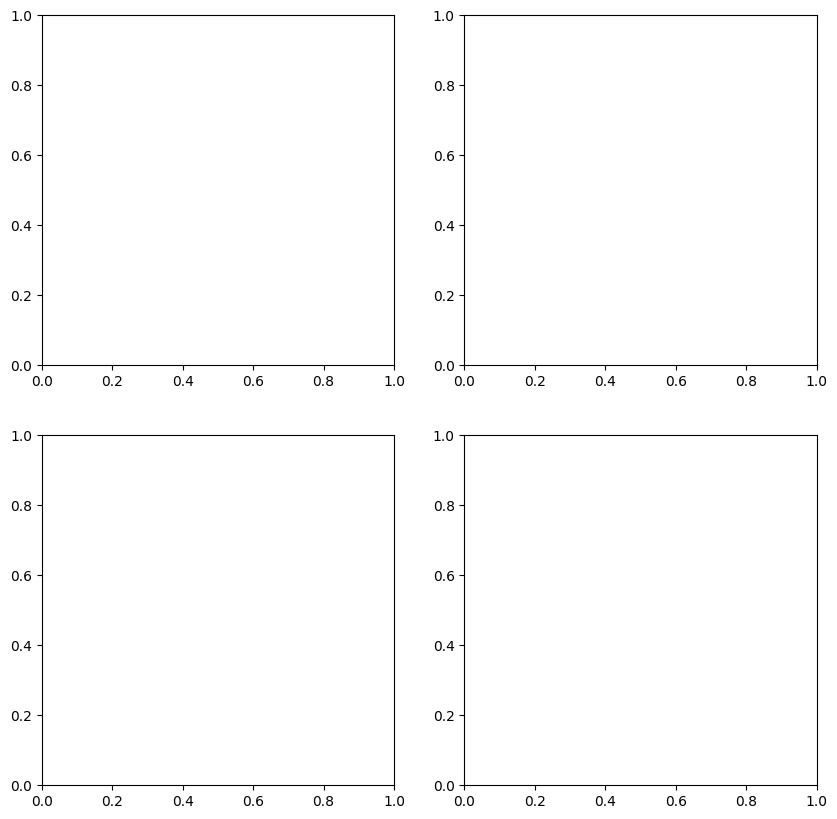

In [246]:
fig, axes = plt.subplots(2,2, figsize=(10,10))
axes[0,0].plot(df_incidents.min_age_participants.value_counts(), kind='bar')
axes[1,0].plot(df_incidents.max_age_participants.value_counts(), kind='bar')    
axes[0,1].plot(df_incidents.avg_age_participants.value_counts(), kind='bar')


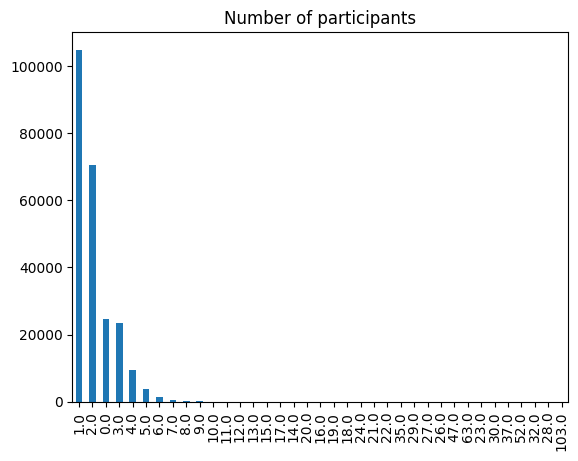

In [248]:
df_incidents['n_participants'].value_counts().plot(kind='bar', title='Number of participants')
plt.show()

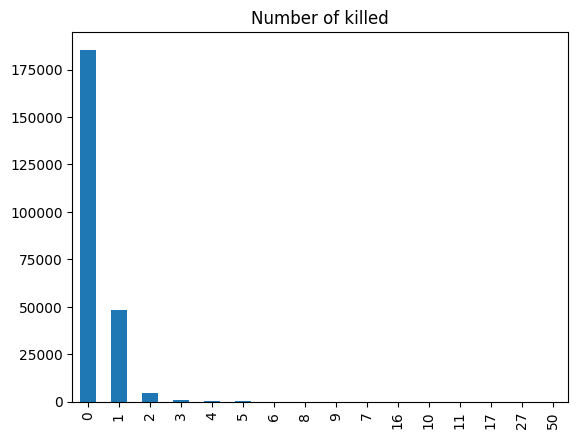

In [31]:
df_incidents['n_killed'].value_counts().plot(kind='bar', title='Number of killed')
plt.show()

<Axes: title={'center': 'Number of killed > 3'}>

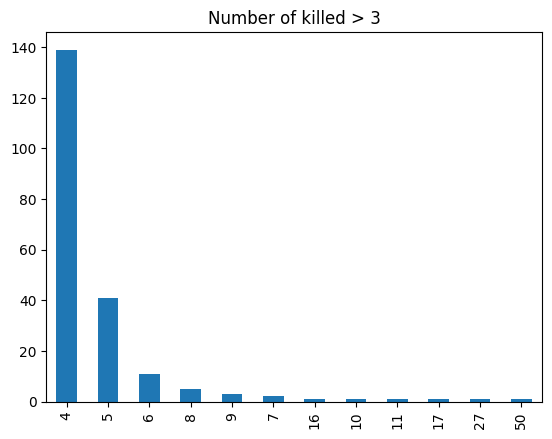

In [32]:
# plot the distribution of the number of killed people > 3
df_incidents[df_incidents.n_killed > 3].n_killed.value_counts().plot(kind='bar', title='Number of killed > 3')

## Correlations

We wanna first see if there is a correlations between the poverty of the state and the number of gun incidents.

In [ ]:
# show incidents happened in 2014
df_incidents_2014=df_incidents[df_incidents.date.dt.year == 2014]
# new df with total number of incidents per state
df_incidents_2014_state = df_incidents_2014.groupby('state').size().reset_index(name='total_incidents')

In [ ]:
df_incidents_2014_state


,state,total_incidents
0,Alabama,810
1,Alaska,122
2,Arizona,409
3,Arkansas,461
4,California,2752
5,Colorado,430
6,Connecticut,448
7,Delaware,346
8,District of Columbia,390
9,Florida,2084


In [ ]:
for state in df_incidents_2014_state.state:
    df_incidents_2014_state.loc[df_incidents_2014_state.state == state, 'povertyPercentage'] = \
        df_poverty[df_poverty.year==2014][df_poverty.state == state].povertyPercentage.values[0]

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_19496\3494591839.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_poverty[df_poverty.year==2014][df_poverty.state == state].povertyPercentage.values[0]
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_19496\3494591839.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_poverty[df_poverty.year==2014][df_poverty.state == state].povertyPercentage.values[0]


In [ ]:
df_incidents_2014_state

,state,total_incidents,povertyPercentage
0,Alabama,810,16.8
1,Alaska,122,11.2
2,Arizona,409,18.1
3,Arkansas,461,16.8
4,California,2752,14.5
5,Colorado,430,10.2
6,Connecticut,448,9.2
7,Delaware,346,11.2
8,District of Columbia,390,17.3
9,Florida,2084,15.2


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_19496\1649330507.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_incidents_2014_state.corr())


                   total_incidents  povertyPercentage
total_incidents           1.000000           0.251593
povertyPercentage         0.251593           1.000000


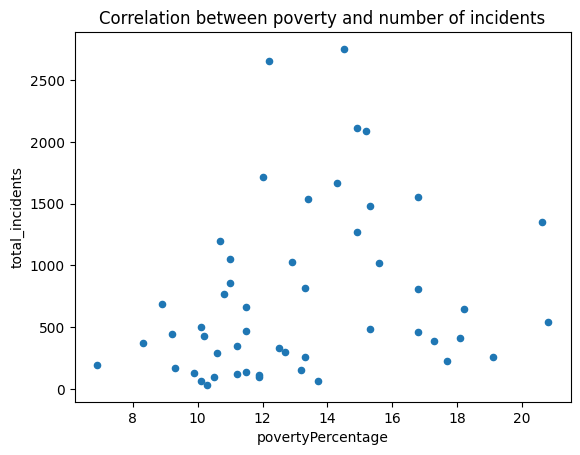

In [ ]:
# correlation between poverty and number of incidents
df_incidents_2014_state.plot(x='povertyPercentage', y='total_incidents', kind='scatter', title='Correlation between poverty and number of incidents')
# print the correlation coefficient
print(df_incidents_2014_state.corr())